In [2]:
import pandas as pd
import numpy as np
# Data : https://drive.google.com/file/d/19-O6HKpcEnSq_O6bAsPoffrz0S7Hg6V3/view
# Load the dataset from a CSV file
data = pd.read_csv(r"F:\programming\machine learning\flat_loss.csv")


# Extract the second column (index 1) as features and reshape to 2D array
# .reshape(-1, 1) ensures the shape is (n_samples, 1)
X = data.iloc[:, 1].values.reshape(-1, 1)  

# Extract the third column (index 2) as the target variable
Y = data.iloc[:, 2].values
print(data.head())     
print("Shape of dataset:", data.shape)

print("X shape:", X.shape)
print("Y shape:", Y.shape)




   Unnamed: 0   location  class
0           0  30.042840      1
1           1  28.889987      1
2           2  30.235829      1
3           3  19.564289      0
4           4  29.400589      1
Shape of dataset: (2000, 3)
X shape: (2000, 1)
Y shape: (2000,)


In [3]:
from sklearn.model_selection import train_test_split  # Function to split data into training and test sets
import numpy as np
from sklearn.preprocessing import StandardScaler      # Tool to normalize feature data (standardization)

# Standardize the features: zero mean and unit variance
scaler = StandardScaler()
# Split the data into training and test sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
def loss(X, W, Y, b):
    """
    Mean Squared Error loss function for linear regression.
    X: feature vector (n_samples,)
    W: weight (scalar)
    Y: target values (n_samples,)
    b: bias (scalar)
    """
    y_pred = X * W + b
    return np.mean((Y - y_pred) ** 2)


def loss_grad(X, W, Y, b):
    """
    Gradient of MSE loss with respect to W and b.
    """
    y_pred = X * W + b
    error = Y - y_pred

    # Derivative w.r.t. W
    dW = np.mean(-2 * error * X)

    # Derivative w.r.t. b
    db = np.mean(-2 * error)

    return np.array([dW, db])


In [5]:
import matplotlib.pyplot as plt  

# Gradient Descent Function for 1 feature
def GD(X, Y, etha, iteration, X2, Y2, betha):
    grad = []      # List to track recent gradients
    loss1 = []     # Training loss history
    loss2 = []     # Test/validation loss history
    it = []        # Epoch counter

    # Initialize weight and bias with small random values
    np.random.seed(42)
    W = np.random.rand() * 0.001
    b = np.random.rand() * 0.001

    for j in range(iteration):
        # Compute gradients
        dW, db = loss_grad(X, W, Y, b)

        # Update weight and bias
        W -= etha * dW
        b -= etha * db

        # Track recent gradients for detecting stagnation
        grad.append(dW)
        if len(grad) == 10:
            T = sum(grad)
            # If recent gradients sum to near-zero, adjust weight slightly
            if abs(T) < 1e-6:
                W += betha  # Small jump to escape potential local flat zone
            grad = grad[1:]  # Maintain rolling window of 10 gradients

        # Record losses
        loss1.append(loss(X, W, Y, b))    # Training loss
        loss2.append(loss(X2, W, Y2, b))  # Test/Validation loss
        it.append(j)                      # Current iteration

    # Return final weights and history
    return [W, b], loss1, it, loss2

# Run gradient descent
# learning rate = 0.01, 100 iterations, gradient rescue step = 50
A = GD(X_train, y_train, 0.01, 100, X_test, y_test, 0.01)


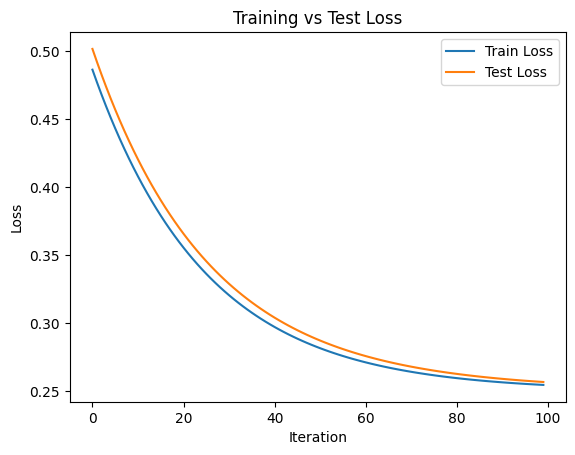

In [6]:
# Plot training loss over iterations
plt.plot(A[2], A[1], label="Train Loss")  # A[2] = iterations, A[1] = training loss history

# Plot test (validation) loss over iterations
plt.plot(A[2], A[3], label="Test Loss")   # A[3] = test loss history

plt.xlabel("Iteration")          
plt.ylabel("Loss")              

# Add a plot title
plt.title("Training vs Test Loss")

plt.legend()

# Display the plot
plt.show()
